#My first Deep learning demo using Tensorflow



###neural Network for handwritten digit classification

---



In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
# import data
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
type(X_train)

numpy.ndarray

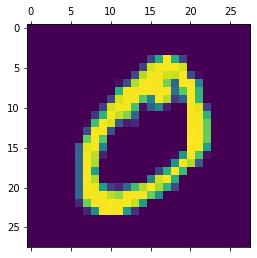

In [9]:
plt.matshow(X_train[1])

In [10]:
y_train[1]

0

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
# normalized the value of the matrices
X_train = X_train/255
X_test = X_test/255

In [13]:
#convert the image matrix into column matrix or flatten the matrix
X_train_flat = X_train.reshape(len(X_train), 28*28)

In [14]:
X_train_flat.shape

(60000, 784)

In [15]:
X_train_flat[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
X_test_flat = X_test.reshape(len(X_test), 28*28)

In [17]:
# create a neural network model with 10 output nodes and 784 nodes input nodes
# Dense => every node is connected to every other nodes.

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4687 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9259


In [18]:
# prediction on test set
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2674 - accuracy: 0.9270


[0.2673628628253937, 0.9269999861717224]

In [19]:
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 0s 1ms/step


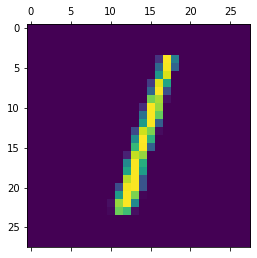

In [20]:
plt.matshow(X_test[2])

In [21]:
y_pred[2]

array([3.7568275e-04, 9.9227434e-01, 6.6278309e-01, 3.0468312e-01,
       2.0530934e-02, 8.9513384e-02, 1.6497512e-01, 1.5328909e-01,
       3.4192073e-01, 4.7120221e-02], dtype=float32)

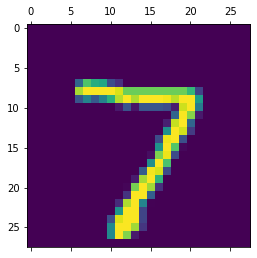

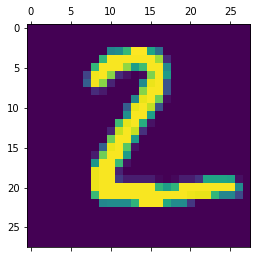

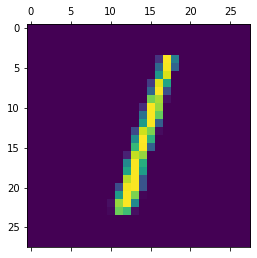

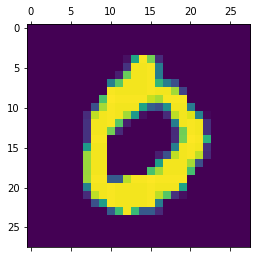

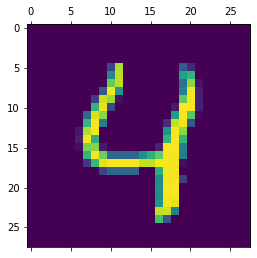

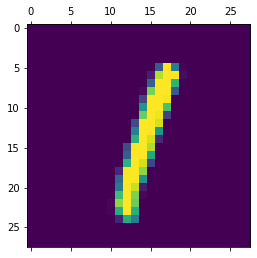

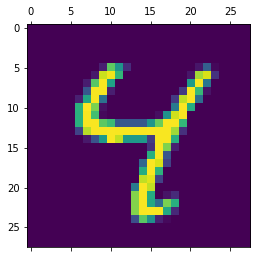

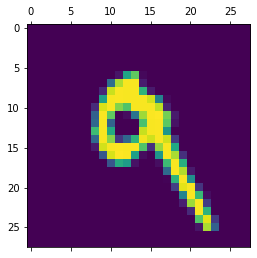

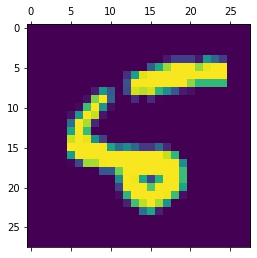

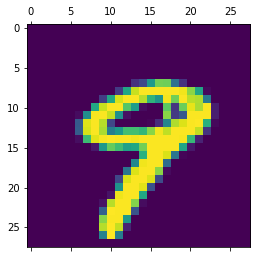

In [22]:
for i in range(10):
  plt.matshow(X_test[i])

In [23]:
for i in range(10):
  max = y_pred[i][0]
  output = 0
  for j in range(1,10):
    if max<= y_pred[i][j]:
      max = y_pred[i][j]
      output = j
  print(i,".",output, "with probability of ", max)

0 . 7 with probability of  0.99977565
1 . 2 with probability of  0.9996231
2 . 1 with probability of  0.99227434
3 . 0 with probability of  0.9992826
4 . 4 with probability of  0.99079293
5 . 1 with probability of  0.997252
6 . 4 with probability of  0.9963182
7 . 9 with probability of  0.97318506
8 . 6 with probability of  0.9995269
9 . 9 with probability of  0.99431586


In [24]:
for i in range(10):
  max = np.max(y_pred[i])
  output = np.argmax(y_pred[i])
  print(i,".",output, "with probability of ", max)

0 . 7 with probability of  0.99977565
1 . 2 with probability of  0.9996231
2 . 1 with probability of  0.99227434
3 . 0 with probability of  0.9992826
4 . 4 with probability of  0.99079293
5 . 1 with probability of  0.997252
6 . 4 with probability of  0.9963182
7 . 9 with probability of  0.97318506
8 . 6 with probability of  0.9995269
9 . 9 with probability of  0.99431586


In [ ]:
output_labels = [np.argmax(i) for i in y_pred]
output_labels

In [26]:
# confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = output_labels )
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    0,    5,    7,    2,    1,    1],
       [   0, 1114,    4,    1,    0,    1,    4,    2,    9,    0],
       [   3,    7,  939,   15,    9,    4,   13,   10,   29,    3],
       [   2,    0,   22,  923,    0,   23,    2,   13,   18,    7],
       [   1,    1,    2,    2,  922,    0,   12,    4,   10,   28],
       [   8,    2,    3,   32,   12,  773,   17,    8,   31,    6],
       [   8,    3,    7,    1,    7,    9,  920,    2,    1,    0],
       [   1,    5,   27,    6,    7,    0,    0,  958,    2,   22],
       [   6,    7,    9,   28,    9,   22,   10,   14,  864,    5],
       [  11,    7,    1,   10,   33,    7,    0,   38,    5,  897]],
      dtype=int32)>

Text(69.0, 0.5, 'True')

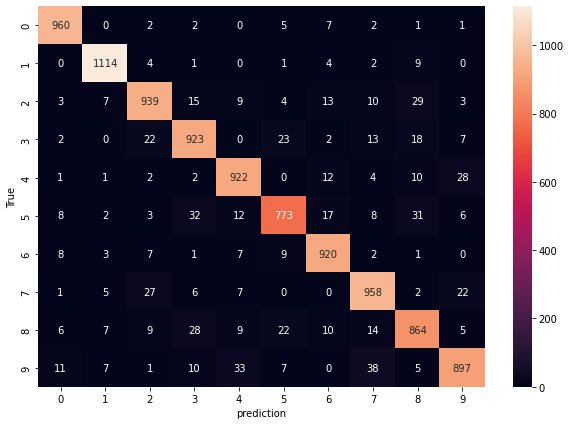

In [27]:
import seaborn as sbn
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel("prediction")
plt.ylabel("True")

In [28]:
#Adding hidden layers to it
# here hidden layer has 100 nodes.

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10,  activation = 'sigmoid')
])

model.compile(optimizer = 'adam', 
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2787 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1274 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.9833


In [29]:
model.evaluate(X_test_flat, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0821 - accuracy: 0.9742


[0.08211816102266312, 0.9742000102996826]

In [30]:
y_pred = model.predict(X_test_flat)

313/313 [==============================] - 1s 4ms/step


In [ ]:
output_labels = [np.argmax(i) for i in y_pred]
output_labels

In [32]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = output_labels )
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    2,    0,    1,    1,    1,    1,    3,    1],
       [   0, 1124,    2,    1,    0,    0,    1,    2,    5,    0],
       [   5,    2, 1004,    7,    3,    1,    0,    4,    6,    0],
       [   0,    0,    1,  995,    0,    1,    0,    6,    5,    2],
       [   1,    0,    4,    0,  965,    0,    2,    4,    1,    5],
       [   3,    1,    0,   14,    1,  851,    3,    3,   12,    4],
       [   9,    3,    3,    1,    6,    5,  926,    0,    5,    0],
       [   2,    5,   11,    2,    0,    0,    0,  998,    5,    5],
       [  10,    0,    2,    9,    3,    1,    0,    2,  946,    1],
       [   3,    5,    0,    7,   16,    2,    0,    6,    6,  964]],
      dtype=int32)>

Text(69.0, 0.5, 'True')

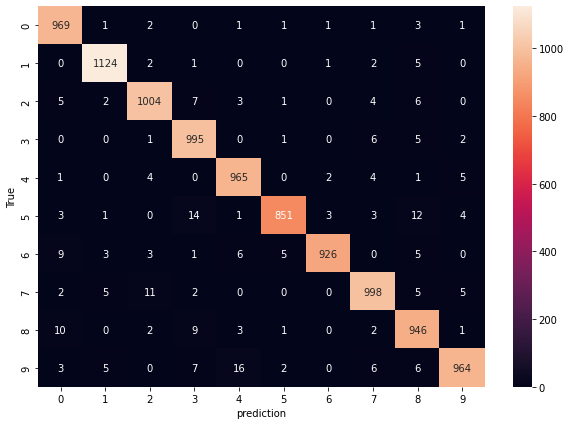

In [33]:
plt.figure(figsize = (10,7))
sbn.heatmap(confusion_matrix, annot = True, fmt = 'd')
plt.xlabel("prediction")
plt.ylabel("True")